In [16]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [18]:
# W.-M. Choi, Y. H. Jo, D. G. Kim, S. Sohn, S. Lee, and B.-J. Lee,
# “A thermodynamic description ofthe Co-Cr-Fe-Ni-V system for
# high-entropy alloy design,” 2019

import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate

db = Database('Fe-Ni-V.tdb')

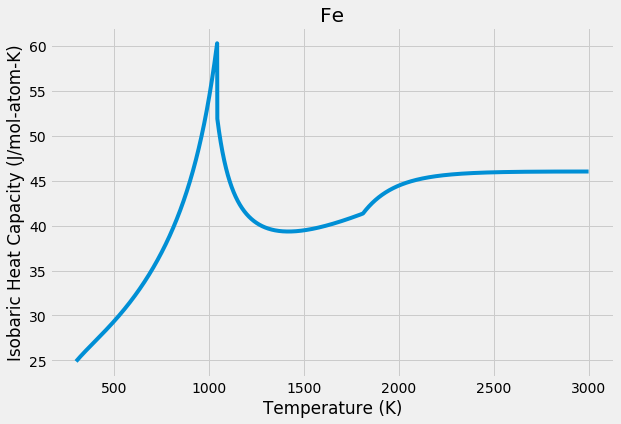

In [50]:
resultFeCp = calculate(db, ['FE','VA'], 'BCC_A2', T=(300, 3000, 0.5), output='heat_capacity')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-atom-K)')
fig.gca().set_title('Fe')
fig.gca().plot(resultFeCp['T'], np.squeeze(resultFeCp['heat_capacity']))
plt.savefig('Fe_Cp.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

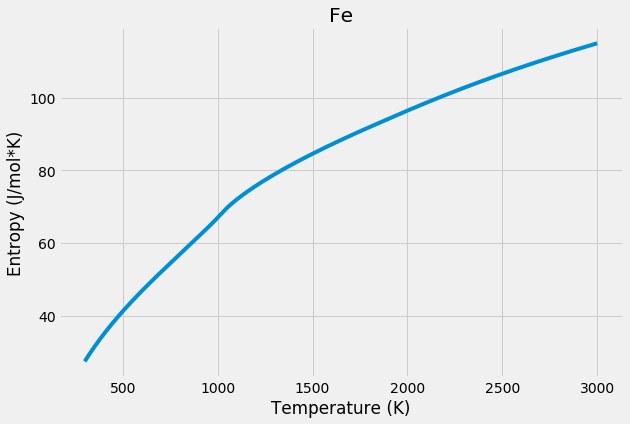

In [51]:
resultFeS = calculate(db, ['FE','VA'], 'BCC_A2', T=(300, 3000, 0.5), output='entropy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Entropy (J/mol*K)')
fig.gca().set_title('Fe')
fig.gca().plot(resultFeCp['T'], np.squeeze(resultFeS['entropy']))
plt.savefig('Fe_S.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

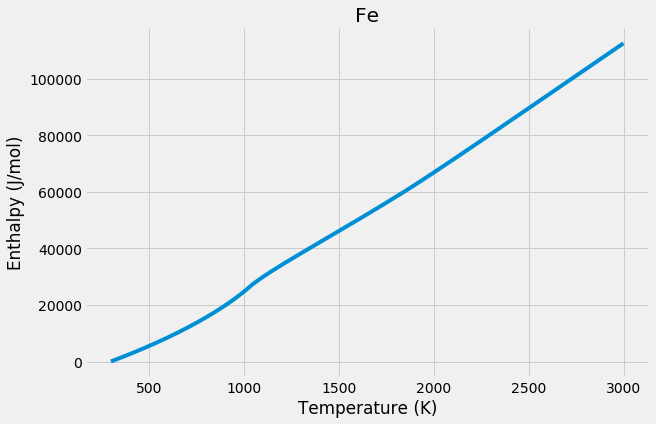

In [52]:
resultFeH = calculate(db, ['FE','VA'], 'BCC_A2', T=(300, 3000, 0.5), output='enthalpy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Enthalpy (J/mol)')
fig.gca().set_title('Fe')
fig.gca().plot(resultFeH['T'], np.squeeze(resultFeH['enthalpy']))
plt.savefig('Fe_H.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

C:\ProgramData\Anaconda3\envs\mxnet\lib\site-packages\pycalphad\codegen\callables.py:96: UserWarning: State variables in `build_callables` are not {N, P, T}, but {T, N}. Be sure you know what you are doing. State variables can be added with the `additional_statevars` argument.
  "argument.".format(state_variables))


KeyError: 'energy'

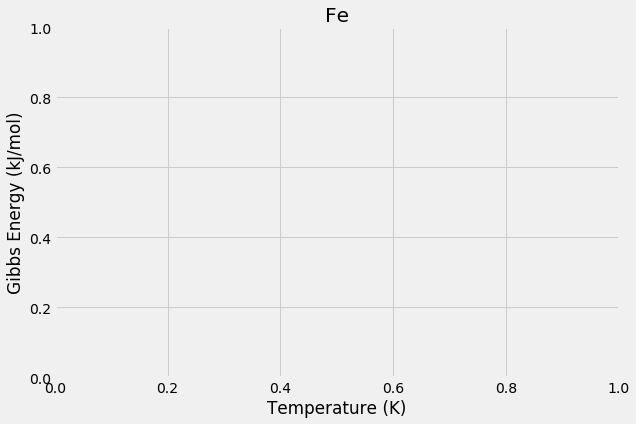

In [57]:
resultFeG = calculate(db, ['FE','VA'], 'BCC_A2', T=(300, 3000, 0.5), output='energy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Gibbs Energy (kJ/mol)')
fig.gca().set_title('Fe')
fig.gca().plot(resultFeG['T'], np.squeeze(0.001*resultFeG['energy']))
plt.savefig('Fe_G.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()





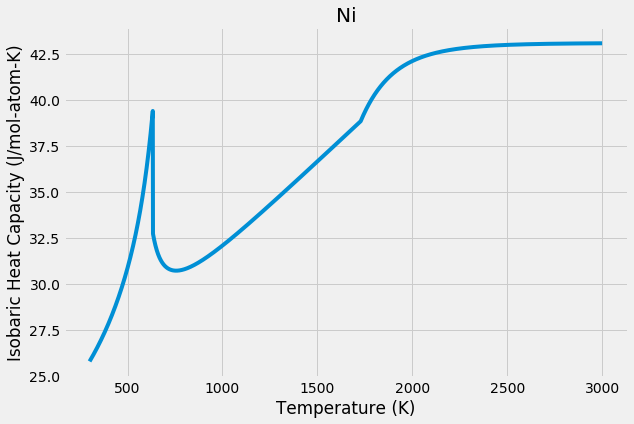

In [65]:
resultNiCp = calculate(db, ['NI','VA'], 'FCC_A1', T=(300, 3000, 0.5), output='heat_capacity')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-atom-K)')
fig.gca().set_title('Ni')
fig.gca().plot(resultNiCp['T'], np.squeeze(resultNiCp['heat_capacity']))
plt.savefig('Ni_Cp.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

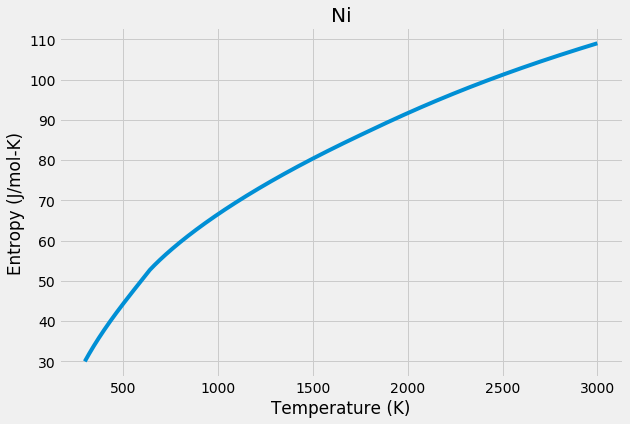

In [66]:
resultNiS = calculate(db, ['NI','VA'], 'FCC_A1', T=(300, 3000, 0.5), output='entropy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Entropy (J/mol-K)')
fig.gca().set_title('Ni')
fig.gca().plot(resultNiS['T'], np.squeeze(resultNiS['entropy']))
plt.savefig('Ni_S.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

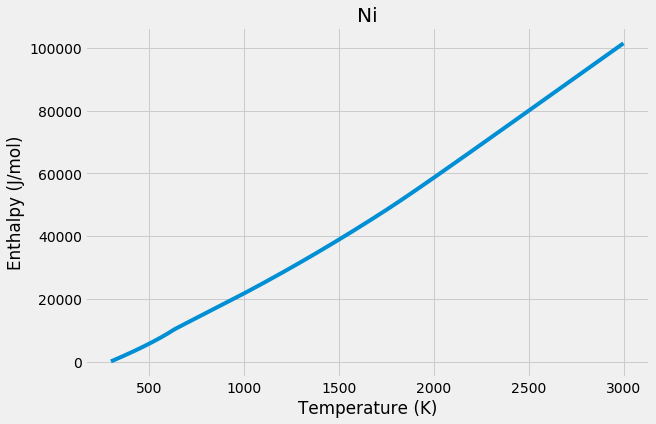

In [67]:
resultNiH = calculate(db, ['NI','VA'], 'FCC_A1', T=(300, 3000, 0.5), output='enthalpy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Enthalpy (J/mol)')
fig.gca().set_title('Ni')
fig.gca().plot(resultNiH['T'], np.squeeze(resultNiH['enthalpy']))
plt.savefig('Ni_H.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

C:\ProgramData\Anaconda3\envs\mxnet\lib\site-packages\pycalphad\codegen\callables.py:96: UserWarning: State variables in `build_callables` are not {N, P, T}, but {T, N}. Be sure you know what you are doing. State variables can be added with the `additional_statevars` argument.
  "argument.".format(state_variables))


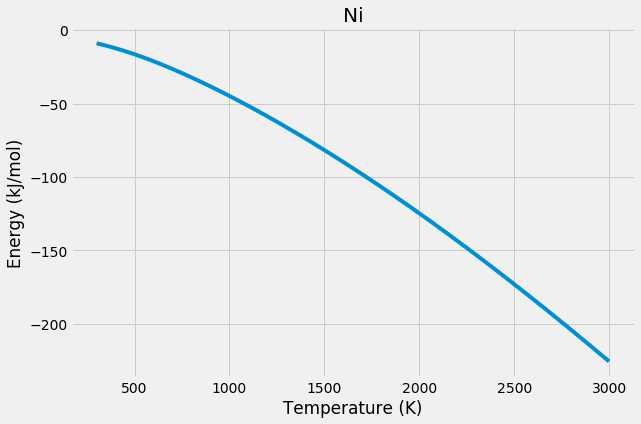

In [68]:
resultNiG = calculate(db, ['NI','VA'], 'FCC_A1', T=(300, 3000, 0.5), output='energy')

fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Energy (kJ/mol)')
fig.gca().set_title('Ni')
fig.gca().plot(resultNiG['T'], np.squeeze(0.001*resultNiG['energy']))
plt.savefig('Ni_G.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()


In [75]:
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v

phases = ['LIQUID', 'FCC_A1', 'BCC_A2']
eq_feni = equilibrium(db, ['FE', 'NI', 'VA'], phases, {v.X('FE'): 0.50, v.T: (300, 2500, 20), v.P: 101325},
                      output='degree_of_ordering')

from pycalphad.plot.utils import phase_legend
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Fe-Ni: Phase fractions vs T [X(Fe)=0.5]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300, 2000))

for name in phases:
    phase_indices = np.nonzero(eq_feni.Phase.values == name)
    plt.scatter(np.take(eq_feni['T'].values, phase_indices[1]), eq_feni.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='lower right')


ValueError: negative dimensions are not allowed

In [92]:
from pycalphad import Database, equilibrium, Model, ReferenceState, variables as v
import matplotlib.pyplot as plt
import numpy as np

comps = ["FE", "NI", "VA"]
phases = ['LIQUID', 'FCC_A1', 'BCC_A2']

# Create reference states
Fe_ref = ReferenceState("FE", "BCC_A2", {v.T: 298.15, v.P: 101325})
Ni_ref = ReferenceState("NI", "FCC_A1", {v.T: 298.15, v.P: 101325})

# Create the models for each phase and shift them all by the same reference states.
eq_models = {}
for phase_name in phases:
    mod = Model(db, comps, phase_name)
    mod.shift_reference_state([Fe_ref, Ni_ref], db)
    eq_models[phase_name] = mod

# Calculate HMR at 2800 K from X(FE)=0 to X(FE)=1
conds = {v.P: 101325, v.T: 298, v.X("Fe"): (0, 1, 0.01)}
result = equilibrium(db, comps, phases, conds, output="HMR", model=eq_models)

# Find the groups of unique phases in equilibrium
unique_phase_sets = np.unique(result.Phase.values.squeeze(), axis=0)

# Plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for phase_set in unique_phase_sets:
    label = '+'.join([ph for ph in phase_set if ph != ''])
    # composition indices with the same unique phase
    unique_phase_idx = np.nonzero(np.all(result.Phase.values.squeeze() == phase_set, axis=1))[0]
    masked_result = result.isel(X_FE=unique_phase_idx)
    ax.plot(masked_result.X_FE.squeeze(), masked_result.HMR.squeeze(), marker='.', label=label)
ax.set_xlim((0, 1))
ax.set_xlabel('X(FE)')
ax.set_ylabel('HM_FORM')
ax.set_title('Fe-Ni Formation Enthalpy (T=298 K)')
ax.legend()
plt.show()

ConditionError: X_FE refers to non-existent component

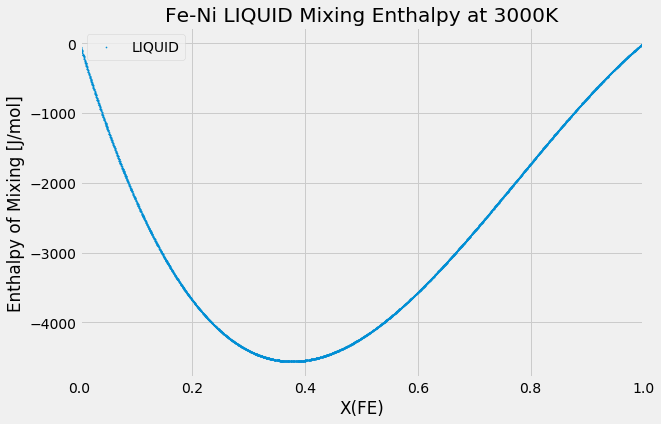

In [94]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
import matplotlib.pyplot as plt

dbf = Database('Fe-Ni-V.tdb')
comps = ["FE", "NI", "VA"]

# Create reference states
Fe_ref = ReferenceState("FE", "LIQUID")
Ni_ref = ReferenceState("NI", "LIQUID")
liq_refstates = [Ni_ref, Fe_ref]

# Create the model and shift the reference state
mod_liq = Model(dbf, comps, "LIQUID")
mod_liq.shift_reference_state(liq_refstates, dbf)
calc_models = {"LIQUID": mod_liq}

# Calculate HMR for the liquid at 2800 K from X(RE)=0 to X(RE)=1
conds = {v.P: 101325, v.T: 3000, v.X("FE"): (0, 1, 0.01)}
result = calculate(dbf, comps, "LIQUID", P=101325, T=3000, output="HMR", model=calc_models)

# Plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.scatter(result.X.sel(component='FE'), result.HMR, marker='.', s=5, label='LIQUID')
ax.set_xlim((0, 1))
ax.set_xlabel('X(FE)')
ax.set_ylabel('Enthalpy of Mixing [J/mol]')
ax.set_title('Fe-Ni LIQUID Mixing Enthalpy at 3000K')
ax.legend()
plt.savefig('FeNi_MX_H.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

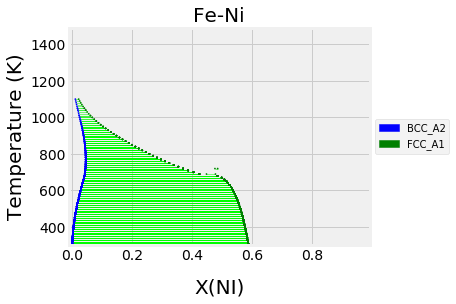

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Define the components
comps = ['FE', 'NI', 'VA']
# Get all possible phases programmatically
phases = db.phases.keys()

# Plot the phase diagram, if no axes are supplied, a new figure with axes will be created automatically
binplot(db, comps, phases, {v.N: 1, v.P:101325, v.T: (300, 1500, 10), v.X('NI'):(0, 1, 0.02)})
plt.savefig('FeNi_PhaseDiagram.png',dpi=600,pad_inches=0.5,bbox_inches = "tight")
plt.show()

<Figure size 432x288 with 0 Axes>